## 1.0 Setup

In [1]:
# Import necessary modules and codes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last"

import pandas as pd
import numpy as np
import os
from pandas import Series, DataFrame
import seaborn as sns
import statsmodels.api as sm
sns.set(rc={'font.size': 35, 'axes.titlesize': 35, 'axes.labelsize':35})
vcvtype = 'nonrobust'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set option to view all columns
pd.set_option('display.max_columns', None)

## 2.0 Data Overview

For the first part of this project, 2 datasets surrounding road accident data will be utilised, one will be referred to as `accident data` and another will be referred to as `driver data`. Both datasets are obtained from the official Department for Transport government website and I will clean them in the following codes.

### 2.1 Reading Data

In [2]:
# Load the accident data
accident_data = pd.read_csv("dataset.csv", low_memory=False)
# Load driver data that contains ages and gender of drivers
ages_data = pd.read_csv("dataset_w_ages.csv", low_memory=False)

In [3]:
# Initial overview
accident_data.head(5)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2.01601E+12,2016,10000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01-11-16,3,02:30,28,E09000005,E09000005,3,4006,6,30.0,0,-1,-1,-1,0,0,5,1,1,0,0,1,1,2,E01000543
1,2.01601E+12,2016,10000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01-11-16,3,00:37,18,E09000004,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,2,E01000375
2,2.01601E+12,2016,10000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01-11-16,3,01:25,26,E09000017,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,2,E01033725
3,2.01601E+12,2016,10000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01-11-16,3,09:15,22,E09000024,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,2,E01003379
4,2.01601E+12,2016,10000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01-11-16,3,07:53,25,E09000018,E09000018,3,312,3,40.0,0,-1,-1,-1,0,0,1,1,1,0,0,1,1,2,E01002583


### 2.2 Checking datatypes and describing variables of `accident data`

Below I will check the count of observations for every variable and the type of each variable. It can be deduced that there are null values in `location_easting_osgr`, `location_northing_osgr`, `longitude`, `latitude` and `speed_limit`.

In [4]:
# Check info such as count of observations and variable types, note that observations are missing for some variables
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597973 entries, 0 to 597972
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               597973 non-null  object 
 1   accident_year                                597973 non-null  int64  
 2   accident_reference                           597973 non-null  object 
 3   location_easting_osgr                        597850 non-null  float64
 4   location_northing_osgr                       597850 non-null  float64
 5   longitude                                    597840 non-null  float64
 6   latitude                                     597840 non-null  float64
 7   police_force                                 597973 non-null  int64  
 8   accident_severity                            597973 non-null  int64  
 9   number_of_vehicles                           597973 non-nul

|**Variables**   |  **Description**  |
|:---| :---|
| **`accident_year`** | Year of accident |
| **`accident_reference`** | Unique identifier for each accident |
| **`longitude`** | Longitude coordinates |
| **`latitude`** | Latitude coordinates |
| **`police_force`** | Coded form of corresponding police force where accident took place |
| **`accident_severity`** | Denotes level of severity of accident **`1 = Slight`** **`3 = Fatal`** |
| **`number_of_vehicles`** | Number of vehicles involved in accident |
| **`number_of_casualties`** | Number of casualties as a result of the accident, since data is on casualties, the lowest number is 1 |
| **`date`** | Date in which accident happened, follows **`%d-%m-%y`** |
| **`day_of_week`** | Day of week in which accident occurred  |
| **`time`** | Time of occurrence, follows **`%H:%M`** |
| **`first_road_class`** | Road class in which accident occurred |
| **`road_type`** | Road type in which accident occurred |
| **`speed_limit`** | Speed limit of the specified road  |
| **`light_conditions`** | Light conditions at time of occurrence |
| **`weather_conditions`** | Weather conditions during time of occurrence |
| **`road_surface_conditions`** | Classification of status of the road surface during time of occurrence |
| **`urban_or_rural_area`** | Classifies the location of occurrence as either urban or rural (or unallocated) |
| **`did_police_officer_attend_scene_of_accident`** | Classifies whether police officer(s) was at scene |

### 2.3 Checking Null Data of `accident data`

In [5]:
# Identify that missing values are in location data, longitude and latitude coordinates as well as speed limit
accident_data.isnull().sum()/len(accident_data)

accident_index                                 0.000000
accident_year                                  0.000000
accident_reference                             0.000000
location_easting_osgr                          0.000206
location_northing_osgr                         0.000206
longitude                                      0.000222
latitude                                       0.000222
police_force                                   0.000000
accident_severity                              0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0.000000
date                                           0.000000
day_of_week                                    0.000000
time                                           0.000000
local_authority_district                       0.000000
local_authority_ons_district                   0.000000
local_authority_highway                        0.000000
first_road_class                               0

### 2.4 Dataset Overview of `driver data`

In [6]:
# Look at dataset containing driver details
ages_data.head(10)

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2016010000005,2016,010000005,1,8,0,6,3,7,0,0,0,0,0,0,3,1,1,1,51,8,-1,-1,-1,-1,3,1
1,2016010000005,2016,010000005,2,2,0,18,7,3,0,0,0,0,0,0,1,1,6,1,23,5,124,1,4,-1,4,1
2,2016010000006,2016,010000006,1,9,0,18,5,1,0,2,2,10,1,0,4,1,6,2,36,7,1461,2,1,-1,10,1
3,2016010000008,2016,010000008,1,9,0,18,1,8,0,4,5,0,0,0,1,1,6,1,24,5,1390,1,5,-1,8,1
4,2016010000016,2016,010000016,1,11,0,18,5,1,0,1,0,0,0,0,0,1,1,1,55,8,6692,2,7,-1,9,1
5,2016010000018,2016,010000018,1,9,0,12,5,1,0,0,0,0,0,0,1,1,6,1,20,4,1596,1,11,-1,2,1
6,2016010000018,2016,010000018,2,1,0,18,5,1,0,0,0,0,0,0,4,1,6,1,28,6,-1,-1,-1,-1,6,1
7,2016010000019,2016,010000019,1,9,0,18,1,5,0,1,0,0,1,0,2,1,6,2,30,6,1596,1,10,-1,3,1
8,2016010000019,2016,010000019,2,9,0,18,1,5,0,1,0,0,0,0,1,1,6,1,27,6,1596,1,5,-1,2,1
9,2016010000020,2016,010000020,1,8,0,18,1,5,0,0,0,0,0,0,4,1,1,1,33,6,2499,2,2,-1,2,1


In [7]:
ages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101591 entries, 0 to 1101590
Data columns (total 27 columns):
 #   Column                            Non-Null Count    Dtype 
---  ------                            --------------    ----- 
 0   accident_index                    1101591 non-null  object
 1   accident_year                     1101591 non-null  int64 
 2   accident_reference                1101591 non-null  object
 3   vehicle_reference                 1101591 non-null  int64 
 4   vehicle_type                      1101591 non-null  int64 
 5   towing_and_articulation           1101591 non-null  int64 
 6   vehicle_manoeuvre                 1101591 non-null  int64 
 7   vehicle_direction_from            1101591 non-null  int64 
 8   vehicle_direction_to              1101591 non-null  int64 
 9   vehicle_location_restricted_lane  1101591 non-null  int64 
 10  junction_location                 1101591 non-null  int64 
 11  skidding_and_overturning          1101591 non-null

From the above, it is observed that there are no null values present in the `driver data` dataset.

|**Variables**   |  **Description**  |
|:---| :---|
| **`accident_reference`** | Unique identifier for each accident, used later to merge with **`accident_data`** |
| **`sex_of_driver`** | Gender of driver, contains **`Male = 1`**, **`Female = 2`** |
| **`age_of_vehicle`** | Age of vehicle(s) involved in the crash |
| **`age_band_of_driver`** | Age band to which driver belongs to |

As it is known that only sex, age and age band of driver will be utilised from the `driver data` dataset, I have described only the relevant variables above. 

## 3.0 Data Cleaning

In [8]:
# Create a function that drops columns that are irrelevant for the analysis at hand
def column_drop(list_of_columns, data):
    for column in list_of_columns:
        data.drop(column, axis=1, inplace=True)
    return data

In [9]:
# Pass in list of columns to drop from dataset
column_list = ["accident_index", 
               "location_easting_osgr", "location_northing_osgr", 
               "local_authority_district", "local_authority_ons_district", 
               "local_authority_highway", "first_road_number", "junction_detail", 
               "junction_control", "second_road_class", "second_road_number",
               "pedestrian_crossing_human_control", 
               "pedestrian_crossing_physical_facilities", "carriageway_hazards", 
               "trunk_road_flag", "lsoa_of_accident_location", "special_conditions_at_site"]

# Call function with the list of columns to drop and the dataset
column_drop(column_list, accident_data)

,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,2016,10000005,-0.279323,51.584754,1,3,2,1,01-11-16,3,02:30,3,6,30.0,5,1,1,1,1
1,2016,10000006,0.184928,51.449595,1,3,1,1,01-11-16,3,00:37,3,6,30.0,4,1,1,1,1
2,2016,10000008,-0.473837,51.543563,1,3,1,1,01-11-16,3,01:25,3,1,30.0,4,1,1,1,1
3,2016,10000016,-0.164442,51.404958,1,3,1,1,01-11-16,3,09:15,3,6,30.0,1,1,1,1,1
4,2016,10000018,-0.406580,51.483139,1,3,2,1,01-11-16,3,07:53,3,3,40.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,2020,991027064,-2.926320,56.473539,99,2,2,1,12-08-20,4,14:30,4,6,30.0,1,1,1,1,1
597969,2020,991029573,-4.267565,55.802353,99,3,1,1,13-11-20,6,15:05,6,9,30.0,1,1,1,1,2
597970,2020,991030297,-2.271903,57.186317,99,2,2,1,15-04-20,4,12:42,4,6,60.0,1,1,1,2,1
597971,2020,991030900,-3.968753,55.950940,99,3,2,1,15-12-20,3,14:00,6,6,30.0,1,1,1,1,2


In [10]:
# Drop null values to avoid them from affecting the subsequent analyses
accident_data.dropna(inplace=True)

In [11]:
accident_data.count() # 170 observations dropped (597973 -> 597803)

accident_year                                  597803
accident_reference                             597803
longitude                                      597803
latitude                                       597803
police_force                                   597803
accident_severity                              597803
number_of_vehicles                             597803
number_of_casualties                           597803
date                                           597803
day_of_week                                    597803
time                                           597803
first_road_class                               597803
road_type                                      597803
speed_limit                                    597803
light_conditions                               597803
weather_conditions                             597803
road_surface_conditions                        597803
urban_or_rural_area                            597803
did_police_officer_attend_sc

In [12]:
# Observe that some variables have -1 values, which represent missing values
accident_data["light_conditions"].unique()

# Drop -1 values by defining a function that takes a list of variables and the dataset
def clear_negative1_values(list_of_columns, data):
    for column in list_of_columns:
        data = data[data[column] != -1]
    return data

# Identify all variables with -1 values within the dataset and list them
column_list2 = ["light_conditions", "road_type", "road_surface_conditions", "did_police_officer_attend_scene_of_accident",
                "urban_or_rural_area", "weather_conditions", "speed_limit"]

# Call the function
accident_data = clear_negative1_values(column_list2, accident_data)

### 3.1 Filtering irrelevant data

Within certain variables there are unknown labelling. For instance, an "unknown weather" or "unknown road type" is denoted as a value of 9. These will have to be dropped as they do not add value to the analysis. 

In [13]:
accident_data = accident_data[accident_data["weather_conditions"] != 9]
accident_data = accident_data[accident_data["weather_conditions"] != 8]
accident_data = accident_data[accident_data["light_conditions"] != 7]
accident_data = accident_data[accident_data["first_road_class"] != 6]
accident_data = accident_data[accident_data["road_type"] != 9]
accident_data = accident_data[accident_data["road_surface_conditions"] != 9]
accident_data = accident_data[accident_data["urban_or_rural_area"] != 3]

In [14]:
accident_data.count() # total of 235,253 observations dropped (597973 -> 595564)

accident_year                                  362720
accident_reference                             362720
longitude                                      362720
latitude                                       362720
police_force                                   362720
accident_severity                              362720
number_of_vehicles                             362720
number_of_casualties                           362720
date                                           362720
day_of_week                                    362720
time                                           362720
first_road_class                               362720
road_type                                      362720
speed_limit                                    362720
light_conditions                               362720
weather_conditions                             362720
road_surface_conditions                        362720
urban_or_rural_area                            362720
did_police_officer_attend_sc

In [15]:
# Observe that some variables have -1 values, which represent missing values
accident_data["light_conditions"].unique()

# Drop -1 values by defining a function that takes a list of variables and the dataset
def clear_negative1_values(list_of_columns, data):
    for column in list_of_columns:
        data = data[data[column] != -1]
    return data

# Identify all variables with -1 values within the dataset and list them
column_list2 = ["light_conditions", "road_type", "road_surface_conditions", "did_police_officer_attend_scene_of_accident",
                "urban_or_rural_area", "weather_conditions", "speed_limit"]

# Call the function
accident_data = clear_negative1_values(column_list2, accident_data)

### 3.2 Feature Engineering and Improving Interpretability

In [16]:
# For better interpretability of results, categorical variables are reversed into written form
def map_categorical(dict_1, data):
    '''
    Takes a dictionary with nested dictionaries; keys as the numeric form of the variable and the values as the corresponding meaning of each number
    Function makes a template of the input dataset and for each nested dictionary, it creates a new column taking the categorical variable colum as reference and using the map method to translate values into written form
    '''
    df_template = data
    n = 0
    for dict_name in dict_1:
        df_template[dict_name] = df_template[list_1[n]].map(dict_1[dict_name])
        n += 1
    return df_template

In [17]:
# Create a list with variables from the dataset that are in numeric form
list_1 = ["weather_conditions", "day_of_week", "accident_severity", "light_conditions", "first_road_class", "road_type", "road_surface_conditions", "police_force", "did_police_officer_attend_scene_of_accident", "urban_or_rural_area"]

# Create a nested dictionary with a new column name as the key and a dictionary as the value, within the nested dictionary, keys are numeric form of variable and values are corresponding meaning
nested_dict = {"weather": {1:'Fine: No High Winds', 2:'Raining: No High Winds', 3:'Snowing: No High Winds', 4:'Fine: High Winds', 5:'Raining: High Winds', 6:'Snowing: High Winds', 7:'Fog or Mist'},
              "day": {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'},
              "severity_level": {1:'Fatal', 2:'Serious', 3:'Slight'},
              "light": {1:'Daylight', 4:'Darkness: Lights Lit', 5:'Darkness: Lights Unlit', 6: 'Darkness: No Lighting'},
              "road_class": {1:'M', 2:'A(M)', 3:'A', 4:'B', 5:'C'},
              "road_types": {1:'Roundabout', 2:'One-Way Street', 3:'Dual Carriageway', 6:'Single Carriageway', 7:'Slip Road', 12:'One-Way Street/Slip Road'},
              "road_surface": {1:'Dry', 2:'Wet/Damp', 3:'Snow', 4:'Frost/Ice', 5:'Flood', 6:'Oil/Diesel', 7:'Mud'},
              "police_forces": {1:'Metropolitan Police', 3:'Cumbria', 4:'Lancashire', 5:'Merseyside', 
                                6:'Greater Manchester', 7:'Cheshire', 10:'Northumbria', 11:'Durham', 12:'North Yorkshire', 
                                13:'West Yorkshire', 14:'South Yorkshire',  16:'Humberside', 17:'Cleveland', 
                                20:'West Midlands', 21:'Staffordshire', 22: 'West Mercia', 23: 'Warwickshire', 
                                30: 'Derbyshire', 31: 'Nottinghamshire', 32: 'Lincolnshire', 33: 'Leicestershire', 
                                34: 'Northhamptonshire', 35: 'Cambridgeshire', 36: 'Norfolk', 37: 'Suffolk', 
                                40: 'Bedfordshire', 41: 'Hertfordshire', 42: 'Essex', 43: 'Thames Valley', 44: 'Hampshire',
                                45: 'Surrey', 46: 'Kent', 47: 'Sussex', 48: 'City of London', 50: 'Devon and Cornwall',
                                52: 'Avon and Somerset', 53: 'Gloucestershire', 54: 'Wiltshire', 55: 'Dorset', 
                                60: 'North Wales', 61: 'Gwent', 62: 'South Wales', 63: 'Dyfed-Powys', 91: 'Northern', 
                                92: 'Grampian', 93: 'Tayside', 94: 'Fife', 95: 'Lothian and Borders', 96: 'Central', 
                                97: 'Strathclyde', 98: 'Dumfries and Galloway', 99: 'Police Scotland'},
              "police_at_scene": {1:'Yes', 2:'No', 3:'No- Self Reported Accident'},
              "urban_or_rural": {1:'Urban', 2:'Rural'}
              }

In [18]:
# Call function to reverse numeric variables
accident_data = map_categorical(nested_dict, accident_data)

In [19]:
# Reset index and do not save it into a new column
accident_data = accident_data.reset_index(drop = True)

### 3.3 Parsing Datetime and Creating necessary Datetime columns

In [21]:
# Splitting variable "time" into two columns, "hours" and "minutes"
accident_data[['hours','minutes']] = accident_data.time.str.split(":",expand=True)

In [22]:
# Splitting variable "date" and creating 1 column for "month"
accident_data['month'] = accident_data.date.str.split("-",expand=True)[1]

### 3.4 Parsing accident_reference in `accident data` to Match with accident_reference in `driver data`

In [23]:
accident_data['accident_reference'] = accident_data['accident_reference'].apply(lambda x: '{0:0>9}'.format(x))

In [25]:
accident_data.head(10)

,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,weather,day,severity_level,light,road_class,road_types,road_surface,police_forces,police_at_scene,urban_or_rural,hours,minutes,month
0,2016,010000005,-0.279323,51.584754,1,3,2,1,01-11-16,3,02:30,3,6,30.0,5,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Darkness: Lights Unlit,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,02,30,11
1,2016,010000006,0.184928,51.449595,1,3,1,1,01-11-16,3,00:37,3,6,30.0,4,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Darkness: Lights Lit,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,00,37,11
2,2016,010000008,-0.473837,51.543563,1,3,1,1,01-11-16,3,01:25,3,1,30.0,4,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Darkness: Lights Lit,A,Roundabout,Dry,Metropolitan Police,Yes,Urban,01,25,11
3,2016,010000016,-0.164442,51.404958,1,3,1,1,01-11-16,3,09:15,3,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,09,15,11
4,2016,010000018,-0.406580,51.483139,1,3,2,1,01-11-16,3,07:53,3,3,40.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Dual Carriageway,Dry,Metropolitan Police,Yes,Urban,07,53,11
5,2016,010000019,-0.121004,51.387813,1,3,2,1,01-11-16,3,09:29,3,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,09,29,11
6,2016,010000020,-0.162234,51.517333,1,3,1,1,01-11-16,3,08:53,5,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,C,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,08,53,11
7,2016,010000021,-0.213859,51.590341,1,3,2,1,01-11-16,3,10:05,3,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,10,05,11
8,2016,010000023,-0.205302,51.510716,1,3,1,1,01-11-16,3,09:51,4,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,B,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,09,51,11
9,2016,010000024,0.023193,51.453758,1,3,2,1,01-11-16,3,09:45,3,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,09,45,11


### 3.5 Follow Steps for the Other Dataset ( `driver data` )

In [26]:
columns_to_drop = ["accident_index", "accident_year", "vehicle_reference",
                   "vehicle_type", "towing_and_articulation", "vehicle_manoeuvre",
                   "vehicle_direction_from", "vehicle_direction_to", 
                   "vehicle_location_restricted_lane", "junction_location",
                   "skidding_and_overturning", "hit_object_in_carriageway",
                   "vehicle_leaving_carriageway", "hit_object_off_carriageway",
                   "first_point_of_impact", "vehicle_left_hand_drive",
                   "journey_purpose_of_driver", "engine_capacity_cc",
                   "propulsion_code", "generic_make_model",
                   "driver_imd_decile", "driver_home_area_type"]

In [27]:
ages_data = column_drop(columns_to_drop, ages_data)

In [28]:
ages_data.count()

accident_reference    1101591
sex_of_driver         1101591
age_of_driver         1101591
age_band_of_driver    1101591
age_of_vehicle        1101591
dtype: int64

In [29]:
# Remove missing values filled in as -1
columns_to_clean = ["age_of_vehicle", "age_band_of_driver",
                    "age_of_driver", "sex_of_driver"]

ages_data = clear_negative1_values(columns_to_clean, ages_data)

In [30]:
# Remove value of "Unknown Gender" for the driver, as it provides no value to the analysis
ages_data = ages_data[ages_data["sex_of_driver"] != 3]

In [31]:
# Reverse categorical variables to make data more interpretable to audience
list_1 = ["sex_of_driver", "age_band_of_driver"]
nested_dict = {"gender_of_driver": {1: "Male", 2: "Female"},
               "age_group_of_driver": {1: "0-5", 2: "6-10", 3: "11-15", 4: "16-20",
                                       5: "21-25", 6: "26-35", 7: "36-45", 8: "46-55",
                                       9: "56-65", 10: "66-75", 11: "Over 75"}
              }

ages_data = map_categorical(nested_dict, ages_data)

In [32]:
# Remove age_band_of_driver variable as the range form defined above is more interpretable
ages_data = column_drop(["age_band_of_driver"], ages_data)
ages_data = ages_data.reset_index(drop = True)

In [33]:
ages_data

,accident_reference,sex_of_driver,age_of_driver,age_of_vehicle,gender_of_driver,age_group_of_driver
0,010000005,1,23,4,Male,21-25
1,010000006,2,36,1,Female,36-45
2,010000008,1,24,5,Male,21-25
3,010000016,1,55,7,Male,46-55
4,010000018,1,20,11,Male,16-20
...,...,...,...,...,...,...
764955,991029573,2,39,7,Female,36-45
764956,991030297,1,57,2,Male,56-65
764957,991030297,1,38,2,Male,36-45
764958,991030900,2,68,1,Female,66-75


### 3.6 Merging `accident data` with `driver data`

In [35]:
# accident_data is merged with ages_data to create a new merged dataframe
merged = pd.merge(accident_data, ages_data, on='accident_reference')
merged.drop_duplicates(inplace=True)
merged.head(10)

,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,weather,day,severity_level,light,road_class,road_types,road_surface,police_forces,police_at_scene,urban_or_rural,hours,minutes,month,sex_of_driver,age_of_driver,age_of_vehicle,gender_of_driver,age_group_of_driver
0,2016,010000005,-0.279323,51.584754,1,3,2,1,01-11-16,3,02:30,3,6,30.0,5,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Darkness: Lights Unlit,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,02,30,11,1,23,4,Male,21-25
1,2016,010000006,0.184928,51.449595,1,3,1,1,01-11-16,3,00:37,3,6,30.0,4,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Darkness: Lights Lit,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,00,37,11,2,36,1,Female,36-45
2,2016,010000008,-0.473837,51.543563,1,3,1,1,01-11-16,3,01:25,3,1,30.0,4,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Darkness: Lights Lit,A,Roundabout,Dry,Metropolitan Police,Yes,Urban,01,25,11,1,24,5,Male,21-25
3,2016,010000016,-0.164442,51.404958,1,3,1,1,01-11-16,3,09:15,3,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,09,15,11,1,55,7,Male,46-55
4,2016,010000018,-0.406580,51.483139,1,3,2,1,01-11-16,3,07:53,3,3,40.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Dual Carriageway,Dry,Metropolitan Police,Yes,Urban,07,53,11,1,20,11,Male,16-20
5,2016,010000019,-0.121004,51.387813,1,3,2,1,01-11-16,3,09:29,3,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,09,29,11,2,30,10,Female,26-35
6,2016,010000019,-0.121004,51.387813,1,3,2,1,01-11-16,3,09:29,3,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,09,29,11,1,27,5,Male,26-35
7,2016,010000020,-0.162234,51.517333,1,3,1,1,01-11-16,3,08:53,5,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,C,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,08,53,11,1,33,2,Male,26-35
8,2016,010000021,-0.213859,51.590341,1,3,2,1,01-11-16,3,10:05,3,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,10,05,11,2,30,15,Female,26-35
9,2016,010000025,-0.149795,51.578827,1,3,3,1,01-11-16,3,09:50,3,6,30.0,1,1,1,1,1,Fine: No High Winds,Tuesday,Slight,Daylight,A,Single Carriageway,Dry,Metropolitan Police,Yes,Urban,09,50,11,1,29,3,Male,26-35


## 4.0 Data Visualisation and Discussions

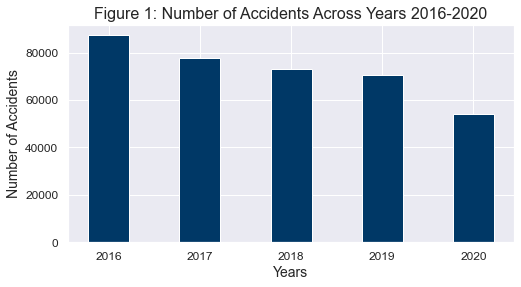

In [36]:
accident_year_bar = accident_data.groupby(['accident_year']).size()
width = 0.45
fig, ax = plt.subplots(figsize=(8, 4))
N = len(set(accident_data['accident_year']))
ind = np.arange(N)
plt.bar(ind, accident_year_bar, width, label = "accident_year", color ='#003866')

# Graph visual representation
plt.xticks(ind, ('2016','2017','2018','2019','2020'))
plt.xlabel("Years", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Figure 1: Number of Accidents Across Years 2016-2020", fontsize=16)

plt.show()

Figure 1 shows the yearly cummulative number of accidents. Clearly, a yearly decline is seen, perhaps as a result of the stringent government policies and road safety procedures. It is also important to note that the lockdown and travel restriction in 2020 has contributed to the significant drop in 2020.

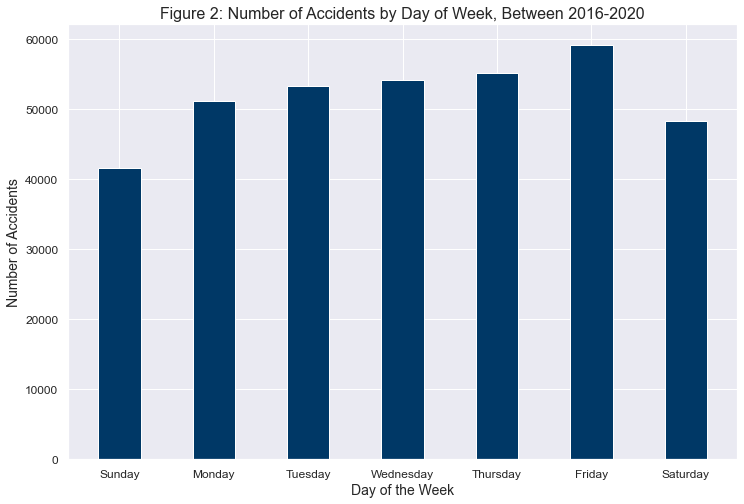

In [37]:
day_of_week_bar = accident_data.groupby(['day_of_week']).size()
width = 0.45
fig, ax = plt.subplots(figsize=(12, 8))
N = len(set(accident_data['day_of_week']))
ind = np.arange(N)
plt.bar(ind, day_of_week_bar, width, label = "day_of_week", color ='#003866')

# Graph visual specifications
plt.xticks(ind, ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Figure 2: Number of Accidents by Day of Week, Between 2016-2020", fontsize=16)

plt.show()

Figure 2 represents the number of accidents that occurred in different days of the week. Evidently, most accidents occurred on Fridays followed by Thursday. The lowest number of accidents occurred on Sundays. This may be due to work commuting during weekdays, compared to weekends when people are more likely to stay at home

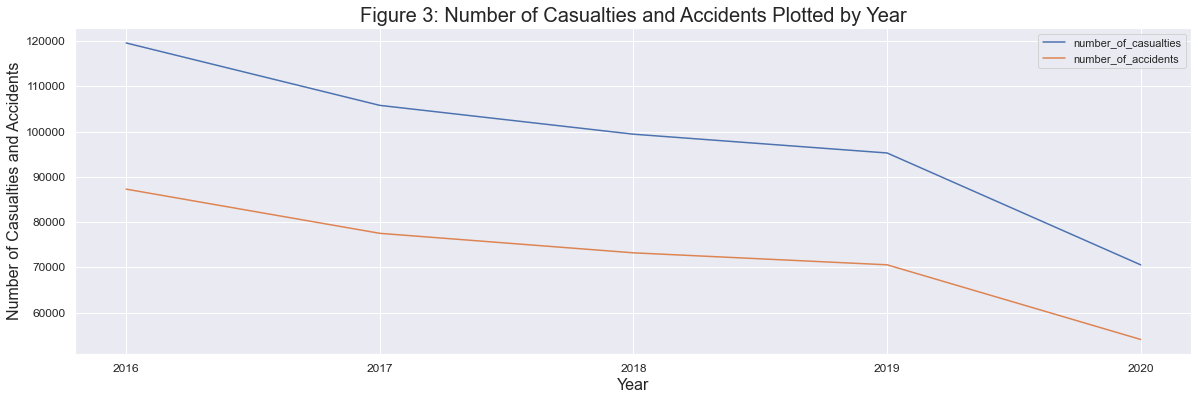

In [39]:
df_linegraph1 = accident_data.groupby(['accident_year'])['number_of_casualties'].sum()
df_linegraph1 = pd.DataFrame(df_linegraph1)
df_linegraph1['number_of_accidents'] = accident_data['accident_year'].value_counts()

df_linegraph1.plot(kind = 'line',
                  figsize = (20,6))

plt.title("Figure 3: Number of Casualties and Accidents Plotted by Year", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Casualties and Accidents", fontsize=16)
plt.xticks(sorted(set(accident_data["accident_year"])))

plt.show()

Figure 3 plots casualties and accidents over year. There is a degree of parallel relationship between casualties and accidents, but notably, number of casualties decreases at a faster rate than number of accidents. While this illustration appears to show the improvement in road accidents, the steep decline could be attributed to the lockdown and travel restrictions in early of 2020.

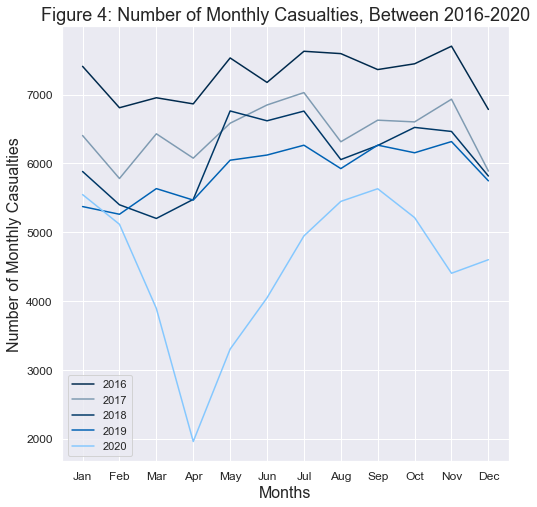

In [40]:
# Create for loop that iterats through year and months and sums
casualty_month_year = [] 

for j in range (2016,2021,1): #iterating through years
    for i in range(1,13,1): #iterating through months 1 to 12(inclusive) with step size of 1.
        if i < 10: i = '0' + str(i)
        casualty_month_year.append(((accident_data['month'] == str(i)) & (accident_data['accident_year'] == j)).sum())
        
# Creates month_intervals for columns
month_intervals = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
      
b_array = np.array(casualty_month_year).reshape(5,12)
b_df = pd.DataFrame(b_array, columns = month_intervals, index = set(accident_data['accident_year'])).T

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(b_df[2016], color = '#002a4d', label = "2016")
plt.plot(b_df[2017], color = '#7F9BB2', label = "2017")
plt.plot(b_df[2018], color = '#003867', label = "2018")
plt.plot(b_df[2019], color = '#0062b4', label = "2019")
plt.plot(b_df[2020], color = '#85c8ff', label = "2020")

plt.legend(loc='best')
plt.xlabel("Months", fontsize=16)
plt.ylabel("Number of Monthly Casualties", fontsize=16)
plt.title("Figure 4: Number of Monthly Casualties, Between 2016-2020", fontsize=18)

plt.show()

Figure 4 plots the number of casualties across different months over the years 2016 to 2020. The most notable feature of the graph is the steep decrease occuring in April 2020. This is attributed to the previous hypothesis regarding the first lockdown and travel restrictions. Furthermore, other trends point towards a common decrease from November to December and carried forward from January to February, as well as an increase in casualties during summer holidays between May-July, which could point back to high travel frequency during holidays.

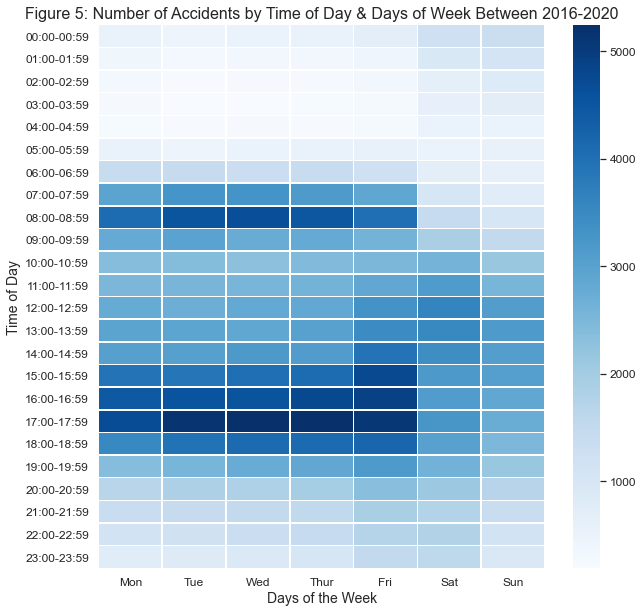

In [43]:
# Create variables with the desired axis tick values
time_intervals = ['00:00-00:59','01:00-01:59','02:00-02:59','03:00-03:59','04:00-04:59','05:00-05:59','06:00-06:59','07:00-07:59','08:00-08:59','09:00-09:59','10:00-10:59','11:00-11:59','12:00-12:59','13:00-13:59','14:00-14:59', '15:00-15:59','16:00-16:59','17:00-17:59','18:00-18:59','19:00-19:59','20:00-20:59','21:00-21:59','22:00-22:59','23:00-23:59']
month_intervals = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Creates a list of unique elements of weekdays, sorted by monday(2) - sunday(1)
weekDays = (2, 3, 4, 5, 6, 7, 1)
#empty list for for loop to append to
crash_day = [] 

for j in range (24): #iterating through hours of the day
    if j < 10:
        j = '0' + str(j) #concatenates a 0 for single digit values in range 24.
    for i in range(7): #iterating through days of the week    
        crash_day.append(((accident_data['day_of_week'] == weekDays[i]) & (accident_data['hours'] == str(j))).sum())

# Converts the list above into a shaped numpy array
crash_day_array = np.array(crash_day).reshape(24,7)

# Create a DataFrame with days of the week as columns and hour intervals as the index
df_crash_day = pd.DataFrame(crash_day_array, columns=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], index=[time_intervals])
# df_crash_day

# Set figure size
fig, ax = plt.subplots(figsize=(10,10))

# Use seaborn library to create heatmap of df_crash
sns.heatmap(df_crash_day, xticklabels=True, yticklabels=True, square=False, linewidths=0.6, cmap='Blues')

# Use matplotlib library to label axis & provide title
plt.title("Figure 5: Number of Accidents by Time of Day & Days of Week Between 2016-2020", fontsize = 16)
plt.xlabel("Days of the Week", fontsize = 14)
plt.ylabel("Time of Day", fontsize = 14)

plt.show()

Figure 5 illustrates that on weekdays the highest number of accidents occur between 08:00-09:00, at an average of 4400 accidents. This is viable assuming that high number of accidents are attributed to the volume of cars travelling for work purposes. Similar can be observed around ‘after-work’ times, between 16:00-18:00 from Monday-Thursdays and Friday at 15:00-18:00.

In [44]:
# create variable month_name in order to make x-axis label more interpretable
month_dict = {"01": "January", "02": "February", "03": "March", "04": "April", "05": "May", "06": "June", 
                             "07": "July", "08": "August", "09": "September", "10": "October", "11": "November", 
                             "12": "December"}
accident_data["month_name"] = accident_data["month"].map(month_dict)

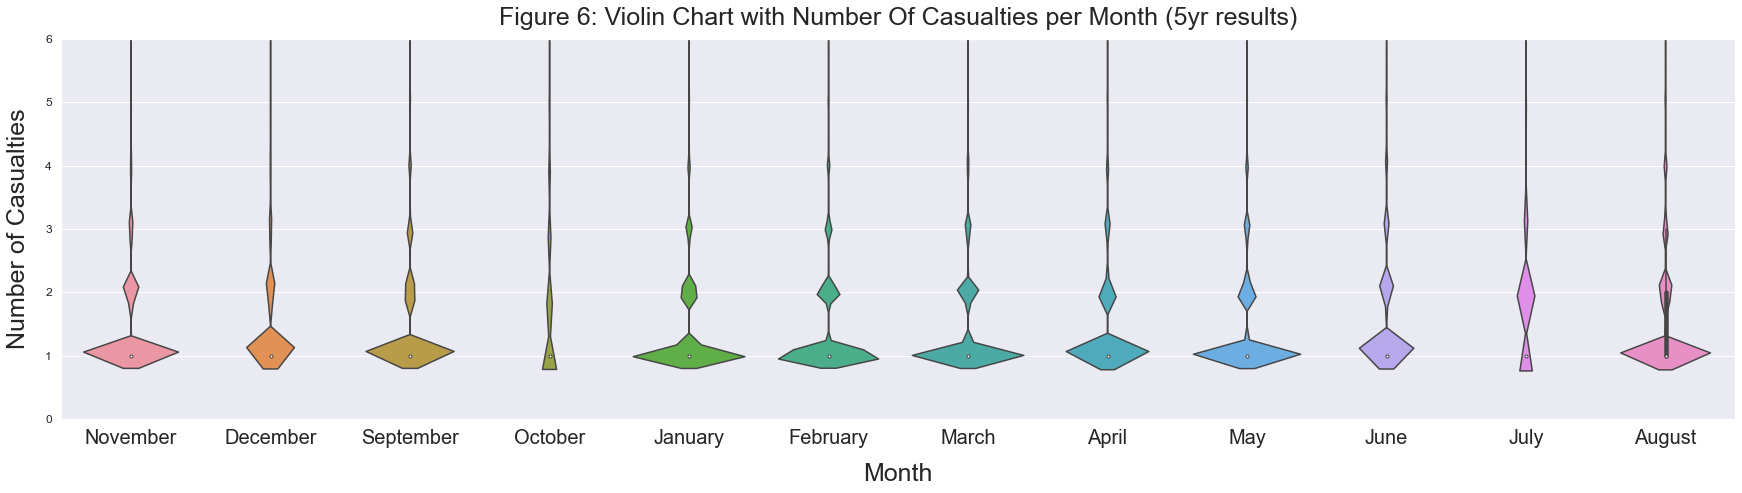

In [45]:
plt.figure(figsize = (30,7))
x=sns.violinplot(x="month_name", y="number_of_casualties", data=accident_data)
plt.title('Figure 6: Violin Chart with Number Of Casualties per Month (5yr results)', fontsize = 25).set_position([.5, 1.02])
plt.xlabel('Month', fontsize = 25, labelpad=15)
plt.ylabel('Number of Casualties', fontsize = 25, labelpad=15)
x.set_xticklabels(x.get_xticklabels(), rotation=0, fontsize=20)
x.set(ylim=(0, 6))

plt.show()

Figure 6 illustrates the distribution in the cummulative number of casualties per month, from 2016 to 2020. We can deduce that a large proportion of road accidents have 1 casualty per accident, followed by 2 casualites. This is insightful as we can infer that many of the accidents that occured are either a person driving the vehicle alone or accident involves only 1 vehicle. Months of October and July seem to have the least amount of accidents resulting in casualties

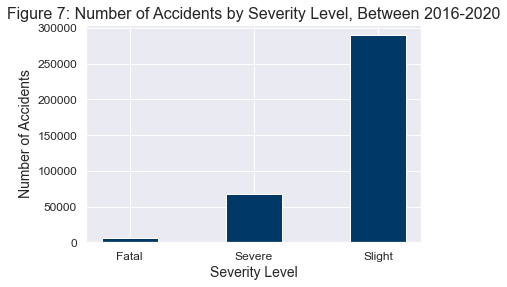

In [47]:
accident_severity_bar = accident_data.groupby(['accident_severity']).size()
width = 0.45

N = len(set(accident_data['accident_severity']))
ind = np.arange(N)
plt.bar(ind, accident_severity_bar, width, label = "accident_severity", color ='#003866')

# Graph visual specifications
plt.xticks(ind, ('Fatal','Severe','Slight'))
plt.xlabel("Severity Level", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Figure 7: Number of Accidents by Severity Level, Between 2016-2020", fontsize=16)

plt.show()

Figure 7 represents number of accidents in different severity levels, with slight severity being most common. In this report:

* **`fatal`**: accidents where at least 1 person was killed
* **`severe`**: at least 1 person was severely injured
* **`slight`**: at least 1 person was slightly injured

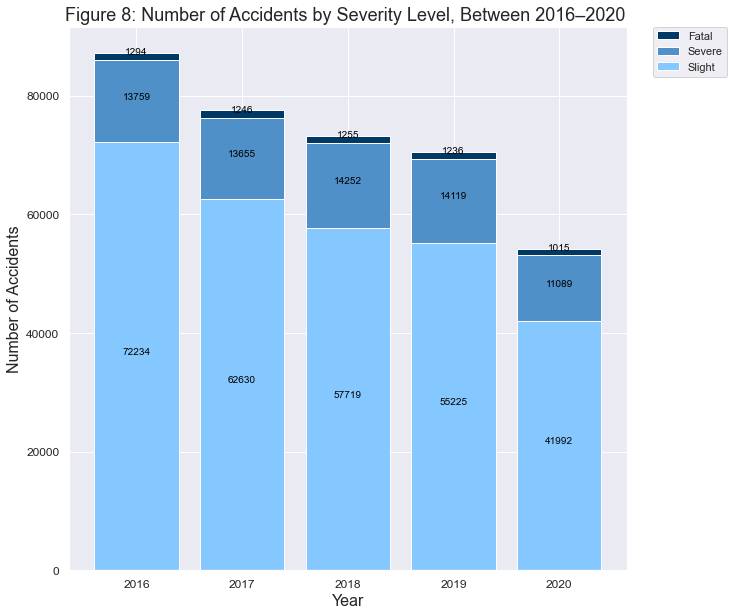

In [49]:
# Create an empty list with keys from accident_severity. 1 = fatal, 2 = severe and 3 = slight
fatal_list = []
severe_list = []
slight_list = []

for (j) in range(3): #Increment through accident_severity
    for i in range (5): #Increment through accident_year
        if j == 0:
            fatal_list.append(((accident_data['accident_year'] == int(i+2016)) & (accident_data['accident_severity'] == int(j+1))).sum()) 
        elif j == 1:
            severe_list.append(((accident_data['accident_year'] == int(i+2016)) & (accident_data['accident_severity'] == int(j+1))).sum())
        else:
            slight_list.append(((accident_data['accident_year'] == int(i+2016)) & (accident_data['accident_severity'] == int(j+1))).sum())
            
# creates arrays for each list above to easily plot y-axis later.
fatal = np.array(fatal_list)
severe = np.array(severe_list)
slight = np.array(slight_list)

# create variable 'year' to easily plot x-axis later. This grabs the unique values in accident_year and sort by ascending
year = sorted(set(accident_data["accident_year"])) 

fig, ax = plt.subplots(figsize=(10,10)) # Set figure size
a= plt.bar(year, fatal, width=0.8, label='Fatal', color= '#003866', bottom=severe+slight) # plots bar (x,y), stacked on top of severe + slight
b= plt.bar(year, severe, width=0.8, label='Severe', color= '#4e90c7', bottom=slight) # plots bar (x,y), stacked on top of slight
c= plt.bar(year, slight, width=0.8, label='Slight', color='#85c8ff')

# setting axis labels, legend, and title
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.legend(bbox_to_anchor = (1.18,1), borderaxespad = 0, loc="upper right")
plt.title("Figure 8: Number of Accidents by Severity Level, Between 2016–2020 ", fontsize=18)

# setting text of the stacked bar chart to be in the center of the bar by dividing height of plot by 2.
for fatal, severe, slight in zip(a, b, c):
    h1 = slight.get_height()
    h2 = severe.get_height()
    h3 = fatal.get_height()
    plt.text(slight.get_x() + slight.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", color="black", fontsize=10)
    plt.text(severe.get_x() + severe.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", color="black", fontsize=10)
    plt.text(fatal.get_x() + fatal.get_width() / 2., h1 + h2 + h3/ 2., "%d" % h3, ha="center", va="bottom", color="black", fontsize=10)

plt.show()

The stacked bar chart in figure 8 represents the number of accidents over 2016-2020 categorized into different severity levels. From the visual we can interpret that the number of accidents with slight severity level showed a steeper decline relative other severity levels of accidents. The fatal accidents remained above 1600 from 2016 to 2019. Furthermore, accidents in the severe category reflected an increasing trend from year 2016 to 2019 however, declined significantly by 4000 accidents from year 2019 to 2020. 

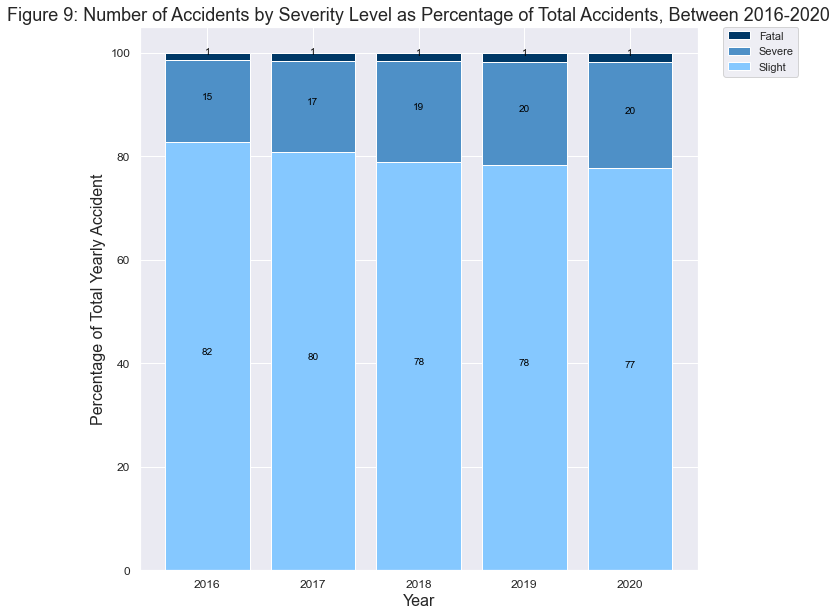

In [50]:
fatal = np.array(fatal_list)
severe = np.array(severe_list)
slight = np.array(slight_list)

total = fatal + severe + slight
proportion_slight = slight/total * 100 #np.true_divide(slight, total) * 100
proportion_severe = severe/total * 100
proportion_fatal = fatal/total * 100

#Plotting the data
fig, ax = plt.subplots(figsize=(10,10))
a = plt.bar(year, proportion_fatal, width=0.8, label='Fatal', color='#003866', bottom=proportion_slight+proportion_severe)
b = plt.bar(year, proportion_severe, width=0.8, label='Severe', color='#4e90c7', bottom=proportion_slight)
c = plt.bar(year, proportion_slight, width=0.8, label='Slight', color='#85c8ff')

plt.ylabel("Percentage of Total Yearly Accident", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.title("Figure 9: Number of Accidents by Severity Level as Percentage of Total Accidents, Between 2016-2020", fontsize=18)
plt.legend(bbox_to_anchor = (1.18,1), borderaxespad = 0, loc="upper right")

# setting text of the stacked bar chart to be in the center of the bar by dividing height of plot by 2.
for proportion_fatal, proportion_severe, proportion_slight in zip(a, b, c):
    h1 = proportion_slight.get_height()
    h2 = proportion_severe.get_height()
    h3 = proportion_fatal.get_height()
    plt.text(proportion_slight.get_x() + proportion_slight.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", color="black", fontsize=10)
    plt.text(proportion_severe.get_x() + proportion_severe.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", color="black", fontsize=10)
    plt.text(proportion_fatal.get_x() + proportion_fatal.get_width() / 2., h1 + h2 + h3/ 2., "%d" % h3, ha="center", va="bottom", color="black", fontsize=10)

plt.show()

Figure 9 represents the severity of accidents as a percentage of total yearly accidents between years 2016-2020. From the visual we can see that slightly severe accidents had a simultaneous decreased in the accidents whereas, severe accidents increased over the years. Fatal accidents remained fairly constant throughout.

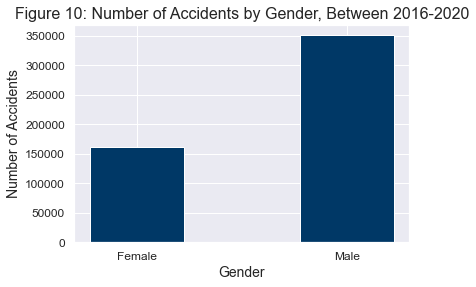

In [51]:
# operation to split gender by count of value
gender_of_driver_bar = merged.groupby(['gender_of_driver']).size()
width = 0.45

N = len(set(merged['gender_of_driver']))
ind = np.arange(N)
plt.bar(ind, gender_of_driver_bar, width, label = "gender_of_driver", color ='#003866')

# Graph visual specifications
plt.xticks(ind, ('Female','Male'))
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Figure 10: Number of Accidents by Gender, Between 2016-2020", fontsize=16)

plt.show()

Figure 10 shows the total number of road accidents that led to an injury by gender of driver. This shows that male drivers are more likely to be involved in road accidents as opposed to female counterparts.

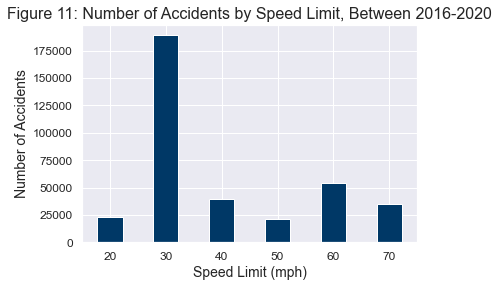

In [52]:
# accident data used since merged data contains multiple repeated columns to represent accidents involving multiple vehicles
speed_limit_bar = accident_data.groupby(['speed_limit']).size()
width = 0.45

N = len(set(accident_data['speed_limit']))
ind = np.arange(N)
plt.bar(ind, speed_limit_bar, width, label = "speed limit", color ='#003866')

# Graph visual specifications
plt.xticks(ind, ('20','30','40','50','60','70'))
plt.xlabel("Speed Limit (mph)", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Figure 11: Number of Accidents by Speed Limit, Between 2016-2020", fontsize=16)

plt.show()

Figure 11 shows the relationship between accidents and the corresponding speed limits of roads where the accident occurred. The figure shows that a significant number of accidents occurred at roads with speed limit of 30 mph. While this is due to the commonality of 30 mph speed limit roads, the DfT road statistics report 2019 highlighted that 54% of drivers go over the speed limit in a 30 mph zone (Department for Transport, 2019).

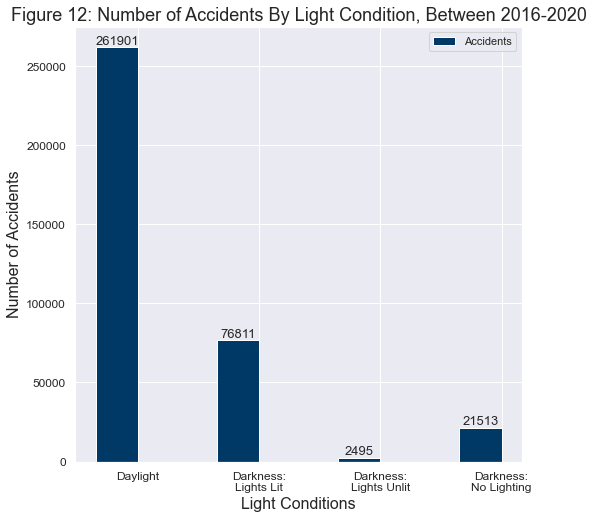

In [53]:
# Prepare data to plot
light_df = pd.DataFrame()
light_df['number_of_accidents'] = accident_data.groupby(['light_conditions']).size() # Calculates size of data in each group in light_condition
light_df = pd.DataFrame(light_df) # Create a dataframe called light_df

# Plotting the data
N = len(set(accident_data['light_conditions'])) # Specifies number of data to be plotted in X axis (index) - used because makes it easier to change the code when the dataset changes.
fig, ax = plt.subplots(figsize=(8, 8)) # Sets figure size
ind = np.arange(N)
width = 0.35 # Sets width of bar chart    
bar_1 = plt.bar(ind, light_df['number_of_accidents'], width, label='Accidents', color='#003866') # Plots bar (x,y)

# Labelling and aesthetics
plt.ylabel('Number of Accidents', fontsize=16)
plt.xlabel('Light Conditions', fontsize=16)
plt.title('Figure 12: Number of Accidents By Light Condition, Between 2016-2020', fontsize=18)
plt.xticks(ind + width / 2, ('Daylight', 'Darkness:\nLights Lit', 'Darkness:\nLights Unlit', 'Darkness:\nNo Lighting')) # Labelling x-axis
plt.legend(loc='best')

# Add counts above the two bar graphs
for rect in bar_1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom', fontsize=13)

plt.show()

Figure 12 illustrates the number of accidents happening under a certain light condition. In this graph, number of accidents is plotted as it gives a true picture of the number of occurrences during daylight, for instance. Hence, we can deduce that most accidents happen when it is daylight, and the least is in darkness with lights unlit.

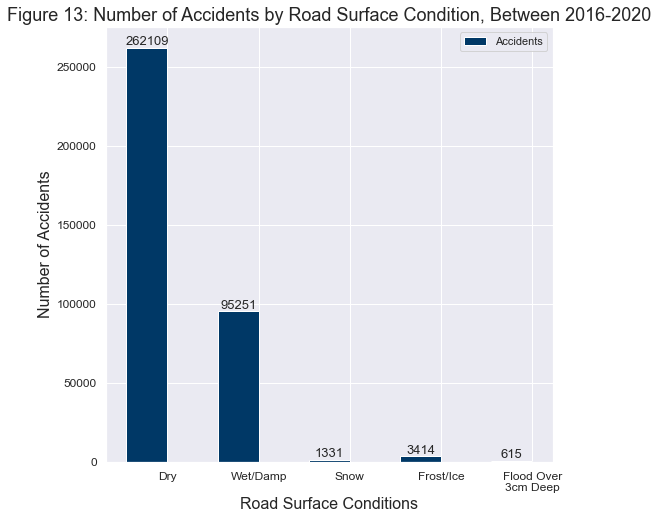

In [54]:
# Prepare the Data for Plotting
road_df = pd.DataFrame()
road_df['number_of_accidents'] = accident_data.groupby(['road_surface_conditions']).size() # Calculates size of data in each group in road_surface_condition
road_df = pd.DataFrame(road_df) # Creates dataframe called road_df

# Plotting the data
N = len(set(accident_data['road_surface_conditions'])) # Specifies number of data to be plotted in X axis (index)
fig, ax = plt.subplots(figsize=(8, 8)) # Specifies figure size
ind = np.arange(N)
width = 0.45 # Width of bar      
bar_2 = plt.bar(ind, road_df['number_of_accidents'], width, label='Accidents', color='#003866') # Plots bar (x,y)

# Labeling and aesthetics
plt.ylabel('Number of Accidents', fontsize=16)
plt.xlabel('Road Surface Conditions', fontsize=16)
plt.title('Figure 13: Number of Accidents by Road Surface Condition, Between 2016-2020', fontsize=18)
plt.xticks(ind + width / 2, ('Dry','Wet/Damp','Snow','Frost/Ice','Flood Over\n3cm Deep')) # Specifies label for X-axis
plt.legend(loc='best')

# Add counts above the two bar graphs
for rect in bar_2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom', fontsize=13)
    
plt.show()

Figure 13 illustrates the number of accidents occuring under a certain road surface condition. Similar to figure 12, this figure uses accidents instead of casualties. Contrary to common assumptions, this figure visualises that accidents happen significantly more frequently in dry road surface conditions.

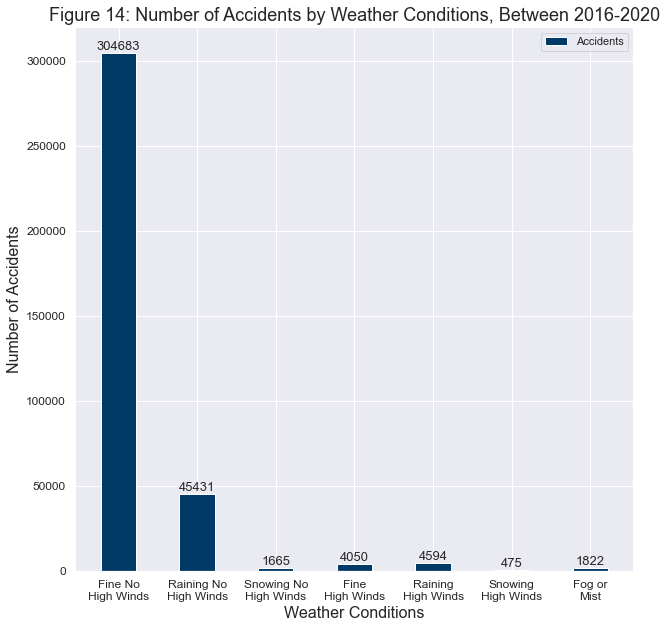

In [55]:
# Prepare the Data for Plotting
weather_df = pd.DataFrame() # Creates empty dataframe
weather_df['number_of_accidents'] = accident_data.groupby(['weather_conditions']).size() # Calculates size of data in each group in weather_conditions
weather_df = pd.DataFrame(weather_df)

# Plotting the data
N = len(set(accident_data['weather_conditions'])) # Specifies number of data to be plotted in X axis (index)
fig, ax = plt.subplots(figsize=(10, 10)) # Specifies figure size
ind = np.arange(N)
width = 0.45 # Width of bar      
bar_2 = plt.bar(ind, weather_df['number_of_accidents'], width, label='Accidents', color='#003866') # Plots bar (x,y)

# Labeling and aesthetics
plt.ylabel('Number of Accidents', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=16)
plt.title('Figure 14: Number of Accidents by Weather Conditions, Between 2016-2020', fontsize=18)
plt.xticks(ind, ('Fine No\nHigh Winds','Raining No\nHigh Winds','Snowing No\nHigh Winds','Fine\nHigh Winds','Raining\nHigh Winds','Snowing\nHigh Winds','Fog or\nMist')) # Specifies label for X-axis
plt.legend(loc='best')

# Add counts above the two bar graphs
for rect in bar_2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom', fontsize=13)
    
plt.show()

Figure 14 illustrates the number of accidents occuring under a certain road surface condition. Contrary to common assumptions, this figure visualises that accidents happen significantly more frequently in fine (no high wind) weather.